In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import of Kaggle dataset of married couples and their astrological aspects based on date of birth.  Data set was in tab-delimited CSV file, and consisted of 1,9522 rows, each row representing a couple.

In [2]:
couple_data = pd.read_csv('Resources/actual_data.csv',sep='\t')
couple_df  = couple_data
couple_df.head()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerSqrMer,...,A-B-CerCnjJun,A-B-CerSxtJun,A-B-CerSqrJun,A-B-CerTriJun,A-B-CerOppJun,A-B-CerCnjCer,A-B-CerSxtCer,A-B-CerSqrCer,A-B-CerTriCer,A-B-CerOppCer
0,15Pari10780,1911.03.09 09:50:40,15Pari10789,1911.04.01 21:20:00,48N49-2E19,48N49-2E19,0.064,,,,...,,,,,,,,,,
1,15Pari76,1880.03.10 10:50:40,15Pari77,1898.08.24 09:20:40,48N49-2E19,48N49-2E19,18.453,,,,...,,,,,,,,,,
2,14PRPari490,1884.04.06 02:52:24,14PRPari491,1886.09.08 20:39:28,47N54-1E54,48N07-5E07,2.422,,,,...,,,,,-0.1,,,,,
3,Bourg2385,1935.10.09 14:40:00,Bourg2386,1937.10.02 20:30:00,47N04-2E22,47N04-2E22,1.981,,,,...,,,,,,,,,,
4,Bourg1498,1893.06.27 19:50:40,Bourg1499,1900.10.11 11:20:40,48N49-2E19,47N04-2E22,7.289,,,,...,,,,,,,,,,


Cleaning Data - Data contained blanks which had to be filled with "0" so Machine Learning models can be applied to the dataset.

In [3]:
couple_df = couple_df.replace({" ":0})
couple_df.tail()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerSqrMer,...,A-B-CerCnjJun,A-B-CerSxtJun,A-B-CerSqrJun,A-B-CerTriJun,A-B-CerOppJun,A-B-CerCnjCer,A-B-CerSxtCer,A-B-CerSqrCer,A-B-CerTriCer,A-B-CerOppCer
19517,Bourg2538,1912.06.06 09:00:00,Bourg2539,1913.11.22 04:00:00,47N04-2E22,47N04-2E22,1.458,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19518,15Pari3873,1902.04.21 03:50:40,15Pari3874,1904.04.13 20:35:40,48N49-2E19,48N49-2E19,1.978,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19519,Bourg441,1933.11.29 11:00:00,Bourg442,1934.09.19 03:10:00,47N04-2E22,47N04-2E22,0.803,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19520,Lil4511,1897.09.21 02:50:40,Lil4514,1898.03.29 06:20:40,50N39-3E04,50N39-3E04,0.522,0,0,0,...,0,0,0,0,0,-0.7,0,0,0,0
19521,14PRPari4269,1899.05.28 10:50:40,14PRPari4270,1897.06.05 17:50:40,47N40-2W43,43N31-6E28,-1.978,0,0,0,...,0,0,4.6,0,0,0,0,0,0,0


Originally, the data contained approximately 405 possible dimensions to analyze.  In order to reduce the scope of analysis, we limited the dimensions to astrological aspects that only included the 9 planets of the solar system, and also focused on aspects that were favorable to a couples compatibility.  To this columns that signified "Square" and "Opposing" aspects were removed, and columns that included aseroids in the aspects.  This reduced the dimension to 110 from 405.  

In [21]:
updated_df = couple_df.loc[:,~couple_df.columns.str.contains('Sqr|Opp')]
updated_df2 = updated_df.loc[:,~updated_df.columns.str.contains('Nod|Jun|Cer')]
updated_df2.head()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerTriMer,...,A-B-SatTriSun,A-B-SatCnjMar,A-B-SatSxtMar,A-B-SatTriMar,A-B-SatCnjJup,A-B-SatSxtJup,A-B-SatTriJup,A-B-SatCnjSat,A-B-SatSxtSat,A-B-SatTriSat
0,15Pari10780,1911.03.09 09:50:40,15Pari10789,1911.04.01 21:20:00,48N49-2E19,48N49-2E19,0.064,0,0,0,...,0,0,0,0,0,0,0,-2.6,0,0
1,15Pari76,1880.03.10 10:50:40,15Pari77,1898.08.24 09:20:40,48N49-2E19,48N49-2E19,18.453,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14PRPari490,1884.04.06 02:52:24,14PRPari491,1886.09.08 20:39:28,47N54-1E54,48N07-5E07,2.422,0,0,6.1,...,0,0,0,0,0,0,3.2,0,0,0
3,Bourg2385,1935.10.09 14:40:00,Bourg2386,1937.10.02 20:30:00,47N04-2E22,47N04-2E22,1.981,0,0,0,...,0,0,-2.6,0,0,0,0,0,0,0
4,Bourg1498,1893.06.27 19:50:40,Bourg1499,1900.10.11 11:20:40,48N49-2E19,47N04-2E22,7.289,0,0,0,...,0,0,2.1,0,0,2.1,0,0,0,0


110 astrological aspects (X) were used as the dimensions to predict the age difference (y) of the couples in the dataset.  

In [23]:

X = updated_df2.iloc[:,7:]
y = updated_df2["B_Minus_A_AgeDifference_Years"].values.reshape(-1, 1)

print(X.shape, y.shape)


(19522, 108) (19522, 1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.04028865066982101
Testing Score: 0.03314104970805998


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 21.356871694734807
R-squared (R2 ): 0.03314104970805998


In [34]:
ranges = []
for row in predicted:
    ranges.append([row[0]-1, row[0]+1])
    

In [35]:
ranges

[[1.863083327840502, 3.863083327840502],
 [1.7376519589036366, 3.7376519589036366],
 [1.6637689643129296, 3.6637689643129296],
 [1.6969250954398372, 3.696925095439837],
 [2.2867692673229247, 4.286769267322924],
 [1.9597431488283674, 3.9597431488283674],
 [1.9845950694195165, 3.9845950694195165],
 [2.1619938561054894, 4.161993856105489],
 [-0.8003469699885666, 1.1996530300114334],
 [0.518725464616538, 2.518725464616538],
 [0.17481487169702992, 2.1748148716970297],
 [1.343049251268439, 3.343049251268439],
 [2.293189123739105, 4.293189123739105],
 [1.9799396366450819, 3.979939636645082],
 [-0.04419173332020332, 1.9558082666797967],
 [1.744976082680711, 3.744976082680711],
 [2.20951709264662, 4.20951709264662],
 [2.3529693070897735, 4.352969307089774],
 [2.0269778491030346, 4.026977849103035],
 [2.0550371596161456, 4.055037159616146],
 [2.0614631293683803, 4.061463129368381],
 [1.8487282022189024, 3.8487282022189024],
 [1.9413503124346034, 3.9413503124346034],
 [1.4434759657581528, 3.44347

In [36]:
y_test

array([[1.786],
       [3.903],
       [1.389],
       ...,
       [2.183],
       [6.967],
       [5.189]])

In [38]:
y_test_temp = []
for row in y_test:
    y_test_temp.append(row[0])

In [41]:
scoring_df = pd.DataFrame({'Actual Value': y_test_temp, 'Prediction': ranges})
scoring_df

,Actual Value,Prediction
0,1.786,"[1.863083327840502, 3.863083327840502]"
1,3.903,"[1.7376519589036366, 3.7376519589036366]"
2,1.389,"[1.6637689643129296, 3.6637689643129296]"
3,2.842,"[1.6969250954398372, 3.696925095439837]"
4,3.447,"[2.2867692673229247, 4.286769267322924]"
5,14.575,"[1.9597431488283674, 3.9597431488283674]"
6,-0.497,"[1.9845950694195165, 3.9845950694195165]"
7,3.614,"[2.1619938561054894, 4.161993856105489]"
8,0.700,"[-0.8003469699885666, 1.1996530300114334]"
9,0.008,"[0.518725464616538, 2.518725464616538]"


In [48]:
#scoring_df['Score'] = scoring_df[(scoring_df['Actual Value'] <= scoring_df['Prediction'][0]) & (scoring_df['Actual Value'] <= scoring_df['Prediction'][1])]

#Low-end Predict and Upper-end Predict
lower_range = []
for row in ranges:
    lower_range.append(row[0])

upper_range = []
for row in ranges:
    upper_range.append(row[1])

In [51]:
scoring_df = pd.DataFrame({'Actual Value': y_test_temp,'Lower Range': lower_range, 'Upper Range': upper_range})
scoring_df.head()

,Actual Value,Lower Range,Upper Range
0,1.786,1.863083,3.863083
1,3.903,1.737652,3.737652
2,1.389,1.663769,3.663769
3,2.842,1.696925,3.696925
4,3.447,2.286769,4.286769


In [70]:
scoring_df['Actual Value'].dtype
scoring_df['Upper Range'].dtype

dtype('float64')

In [79]:
scoring_df['Score'] = (scoring_df['Actual Value'] >= scoring_df['Lower Range'])&( scoring_df['Actual Value'] <= scoring_df['Upper Range'])

In [80]:
scoring_df

,Actual Value,Lower Range,Upper Range,Score
0,1.786,1.863083,3.863083,False
1,3.903,1.737652,3.737652,False
2,1.389,1.663769,3.663769,False
3,2.842,1.696925,3.696925,True
4,3.447,2.286769,4.286769,True
5,14.575,1.959743,3.959743,False
6,-0.497,1.984595,3.984595,False
7,3.614,2.161994,4.161994,True
8,0.700,-0.800347,1.199653,True
9,0.008,0.518725,2.518725,False


In [61]:
True_df = scoring_df[(scoring_df['Actual Value'] >= scoring_df['Lower Range']) & (scoring_df['Actual Value'] <= scoring_df['Upper Range'])]

In [81]:
True_df

,Actual Value,Lower Range,Upper Range
3,2.842,1.696925,3.696925
4,3.447,2.286769,4.286769
7,3.614,2.161994,4.161994
8,0.700,-0.800347,1.199653
10,0.294,0.174815,2.174815
11,1.744,1.343049,3.343049
14,0.806,-0.044192,1.955808
20,2.628,2.061463,4.061463
22,2.822,1.941350,3.941350
27,0.125,-0.864348,1.135652


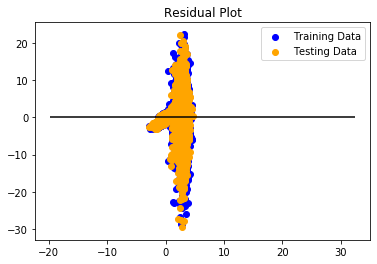

In [27]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [28]:
model.score(X_test, y_test)

0.03314104970805998

In [29]:
model.predict(X_test)

array([[2.86308333],
       [2.73765196],
       [2.66376896],
       ...,
       [3.23541942],
       [3.02518378],
       [2.99388745]])

In [30]:
y_test

array([[1.786],
       [3.903],
       [1.389],
       ...,
       [2.183],
       [6.967],
       [5.189]])

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
# Fit the model to the data
kmeans.fit(X)
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)
predicted_clusters

array([11,  9,  9, ...,  9,  4,  9])

In [ ]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_


In [ ]:
centers

In [ ]:
labels